In [3]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
from matplotlib.sankey import Sankey
import numpy as np

In [5]:
yellowC = '#f2ec83'
violetC = '#b685ba'
pinckC = '#FF9999'
darckGreenC = '#779945'
greenC = '#70bb03'


### Text Chapter 1. 
Population specific Metagenome-Assembled Genomes (MAGs) reference

In [6]:
path = '/Users/katerynapantiukh/Documents/1MyDisk/PhD/!MAIN_data/'
#path = '/Users/ketpantuh/Documents/1MyDisk/PhD/!MAIN_data/' # macbook

# mags info
all_hq = pd.read_excel(str(path)+'bgi_assembly_v1/HQcl_all_bins_all_info.xlsx')
all = pd.read_excel(str(path)+'bgi_assembly_v1/together_all_MAGs_all_info.xlsx')
rep = pd.read_excel(str(path)+'bgi_assembly_v1/HQcl_representative_MAGs_updated_v2.xlsx')

# used samples subset
all_hq['sample_name'] = all_hq['bin_name'].str.split('_').str[0]
smpls = all_hq['sample_name'].unique()
smpls = pd.DataFrame(smpls)
smpls.rename(columns={0: "sample_name"}, inplace=True)

# metadata
# read meta data
meta = pd.read_excel('input/EstMB_phenotype_data.xlsx', index_col=False)
metaC = meta[['gender', 'Age_at_MBsample', 'BMI','skood']]
# read match file
mtch = pd.read_excel('input/MB_scode_vcode.xlsx')
mtch = mtch[['skood', 'vkood']]
metaC = metaC.merge(mtch, on='skood', how='inner')
metaC = metaC.merge(smpls, left_on='vkood', right_on='sample_name', how='inner')
len(metaC)

# BGI reads info
bgi = pd.read_csv('input/ReadsNumb_BGI.csv')
bgi['sample_name'] = bgi['name'].str.split('_').str[1]
bgi.rename(columns={"name": "BGI_reads_file", "reads_numb": "BGI_reads_numb"}, inplace=True)
bgi = bgi.sort_values(by=['BGI_reads_numb'])
bgi = bgi.merge(smpls, on='sample_name', how='inner')

# abud
abud = pd.read_csv(str(path)+'bgi_abud_tables/bgi_assembly_v1_SpLevel_RelAbund.csv')
# skip first row
abud = abud.iloc[1:]
abud.set_index('rep_MAG_ID', inplace=True)
abud = abud.T
abud.reset_index(inplace=True)

# prev
ovs = pd.read_excel('input/Preval_pic.xlsx')

In [7]:
# smpls
print('Number of analysed samples:', len(smpls), '\n')

# meta
print('Females: ', len(metaC[metaC['gender'] == 1]))
print('Males: ', len(metaC[metaC['gender'] == 0]))
print('Min age: ', metaC['Age_at_MBsample'].min())
print('Max age: ', metaC['Age_at_MBsample'].max(), '\n')

# reads
r = bgi['BGI_reads_numb'].median()
print('Median Reads number per sample: ', (r/1000000).round(2), 'mln', '\n')

# mags
print('Number of all extracted genomes:', len(all))
print('Number of HQ rep MAGs:', len(all[all['bin_qual'] == 'HQ']), '(', str(len(all[all['bin_qual'] == 'HQ'])/len(all)*100)[0:5], '%)')
print('Number of good enough rep genomes for clustered to sp.:', len(all_hq), '(', str(len(all_hq)/len(all)*100)[0:5], '%)', '\n')

print('Median Completeness for all mags is:', all['completeness'].median())
print('Median Contamination for all mags is:', all['contamination'].median())
# calculate IQR1
data = all['completeness']
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
print("Interquartile Range (IQR), completeness:", q1, '-', q3)
# calculate IQR2
data = all['contamination']
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
print("Interquartile Range (IQR), contamination:", q1, '-', q3, '\n')

print('Average number of extracted genomes per sample is:', str(len(all)/1878)[0:5], '\n')

# rep mags
print('Number of representative genomes:', len(rep))
print('Number of HQ+mimag rep MAGs:', len(rep[rep['MAG_qual'] == 'HQ'])+len(rep[rep['MAG_qual'] == 'HQ_mimag']), '(', str((len(rep[rep['MAG_qual'] == 'HQ'])+len(rep[rep['MAG_qual'] == 'HQ_mimag']))/len(rep)*100)[0:5], '%)')
print('Number of mimag rep MAGs:', len(rep[rep['MAG_qual'] == 'HQ_mimag']), '(', str(len(rep[rep['MAG_qual'] == 'HQ_mimag'])/len(rep)*100)[0:5], '%)')

print('Median Completeness for representative genomes is:', rep['Completeness'].median())
print('Median Contamination for representative genomes is:', rep['Contamination'].median())
# calculate IQR1
data = rep['Completeness']
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
print("Interquartile Range (IQR), completeness:", q1, '-', q3)
# calculate IQR2
data = rep['Contamination']
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
print("Interquartile Range (IQR), contamination:", q1, '-', q3)

Number of analysed samples: 1878 

Females:  1308
Males:  570
Min age:  23.0
Max age:  89.0 

Median Reads number per sample:  53.04 mln 

Number of all extracted genomes: 84762
Number of HQ rep MAGs: 42049 ( 49.60 %)
Number of good enough rep genomes for clustered to sp.: 69333 ( 81.79 %) 

Median Completeness for all mags is: 93.1
Median Contamination for all mags is: 1.72
Interquartile Range (IQR), completeness: 84.48 - 98.28
Interquartile Range (IQR), contamination: 0.0 - 4.47 

Average number of extracted genomes per sample is: 45.13 

Number of representative genomes: 2257
Number of HQ+mimag rep MAGs: 1647 ( 72.97 %)
Number of mimag rep MAGs: 475 ( 21.04 %)
Median Completeness for representative genomes is: 95.55
Median Contamination for representative genomes is: 0.57
Interquartile Range (IQR), completeness: 90.82 - 98.64
Interquartile Range (IQR), contamination: 0.14 - 1.81


In [8]:
phy = rep['phylum'].value_counts()
phy = phy.reset_index()
phy.rename(columns={'index': "phylum", 'phylum': "count"}, inplace=True)
print('Number of detected phyla:',len(phy))
phy['perc'] = phy['count']/len(rep)*100
print('Together main 3 phyla include:', str(phy['perc'].head(3).sum())[0:5],'% of rep MAGs')
phy.head(3)


Number of detected phyla: 20
Together main 3 phyla include: 78.06 % of rep MAGs


,phylum,count,perc
0,Bacillota_A,1213,53.743908
1,Bacteroidota,337,14.931325
2,Bacillota,212,9.393000


In [9]:
sp = rep[['sp','MAGs_per_cluster']].head()
sp['perc'] = sp['MAGs_per_cluster']/len(smpls)*100
sp

,sp,MAGs_per_cluster,perc
0,Odoribacter splanchnicus,1332,70.926518
1,Barnesiella intestinihominis,1180,62.832801
2,Parabacteroides distasonis,1134,60.383387
3,Alistipes putredinis,1024,54.526092
4,Agathobacter rectalis,975,51.916933


### Text Chapter 2. 
Potentially new species and comparison population specific reference with global reference UHGG

In [10]:
print('New sp number:', len(rep[rep['sp'] == 'undefined']))
print('New sp perc:', str(len(rep[rep['sp'] == 'undefined'])/len(rep)*100)[0:5],'%')

newsp = rep[rep['sp'] == 'undefined']
print('Number of both HQ+mimag new sp MAGs:', len(newsp[newsp['MAG_qual'] == 'HQ'])+len(newsp[newsp['MAG_qual'] == 'HQ_mimag']), '(', str((len(newsp[newsp['MAG_qual'] == 'HQ'])+len(newsp[newsp['MAG_qual'] == 'HQ_mimag']))/len(newsp)*100)[0:5], '%)')
print('Number of mimag only HQ new sp MAGs:', len(newsp[newsp['MAG_qual'] == 'HQ_mimag']), '(', str(len(newsp[newsp['MAG_qual'] == 'HQ_mimag'])/len(newsp)*100)[0:5], '%)','\n')

print('Number new sp with 1 MAG:', len(newsp[newsp['MAGs_per_cluster'] == 1]), '(', str(len(newsp[newsp['MAGs_per_cluster'] == 1])/len(newsp)*100)[0:5], '%)')
print('New sp MAGs recovered from more then 1% of samples (>18):', len(newsp[newsp['MAGs_per_cluster'] >= 18]))
print('New sp MAGs unique genus:', len(newsp['genus'].unique()))

New sp number: 353
New sp perc: 15.64 %
Number of both HQ+mimag new sp MAGs: 231 ( 65.43 %)
Number of mimag only HQ new sp MAGs: 57 ( 16.14 %) 

Number new sp with 1 MAG: 233 ( 66.00 %)
New sp MAGs recovered from more then 1% of samples (>18): 5
New sp MAGs unique genus: 182


In [11]:
# present at USGG and not-new sp
c = len(rep[(rep['present_at_UHGG'] == 'EstMAG_overlap') & (rep['sp'] != 'undefined')])
print('Number of EstMAGs present at UHGG and not-new sp:', c)

# present at USGG and new sp
c = len(rep[(rep['present_at_UHGG'] == 'EstMAG_overlap') & (rep['sp'] == 'undefined')])
print('Number of EstMAGs present at UHGG and new sp:', c)

# not present at USGG and not-new sp
c = len(rep[(rep['present_at_UHGG'] != 'EstMAG_overlap') & (rep['sp'] != 'undefined')])
print('Number of EstMAGs not present at UHGG and not-new sp:', c)

# not present at USGG and new sp
c = len(rep[(rep['present_at_UHGG'] != 'EstMAG_overlap') & (rep['sp'] == 'undefined')])
print('Number of EstMAGs not present at UHGG and new sp:', c)

print('total:', 1576+74+328+279)

Number of EstMAGs present at UHGG and not-new sp: 1576
Number of EstMAGs present at UHGG and new sp: 74
Number of EstMAGs not present at UHGG and not-new sp: 328
Number of EstMAGs not present at UHGG and new sp: 279
total: 2257


In [7]:
# Calclate cumulative number of undefined species
nsp = all_hq[['bin_name', 'sp', 'rep_MAG_ID']]
nsp['sample_name'] = nsp['bin_name'].str.split('_').str[0]
mrg = nsp.drop('bin_name', axis=1)

samples_df = pd.DataFrame(mrg['sample_name'].unique(), columns=['sample_name'])
undefined_unique_per_cluster = mrg[mrg['sp'] == 'undefined'].drop_duplicates(subset=['rep_MAG_ID'])
undefined_counts = undefined_unique_per_cluster.groupby('sample_name').size().reset_index(name='undefined_count')
samples_df = pd.merge(samples_df, undefined_counts, on='sample_name', how='left').fillna({'undefined_count': 0})
samples_df['cumulative_undefined'] = samples_df['undefined_count'].cumsum()

#samples_df.to_excel('results/cumulative_undefined.xlsx')
samples_df.tail(2)

/var/folders/fr/j_4kmkcj6zs6nglntg64jfgr0000gn/T/ipykernel_59722/662146023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nsp['sample_name'] = nsp['bin_name'].str.split('_').str[0]


,sample_name,undefined_count,cumulative_undefined
1876,VJB0XB,0.0,353.0
1877,VV5SGU,0.0,353.0


In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape index for scikit-learn
X = samples_df.index.values.reshape(-1, 1)  # Independent variable
y = samples_df['cumulative_undefined']  # Dependent variable

# Create and fit the model
model = LinearRegression(fit_intercept=False).fit(X, y)

# Print the coefficients
print('Intercept:', model.intercept_)
print('Slope:', model.coef_[0])
# Calculate and print the R^2 score
r2_score = model.score(X, y)
print('R^2:', r2_score)

y_pred = model.predict(X)

# Calculate expected amount of new species for N samples
n = 500
print('\n Expected amount of new species for', n, 'samples:', (model.intercept_+n*model.coef_[0]).round(0))

Intercept: 0.0
Slope: 0.20471383847898061
R^2: 0.9777092700806336

 Expected amount of new species for 500 samples: 102.0


In [14]:
# Comparing with global reference UHGG
print('Number of rep MAGs overlap with UHGG:', len(rep[rep['present_at_UHGG'] == 'EstMAG_overlap']), '(', 
str(len(rep[rep['present_at_UHGG'] == 'EstMAG_overlap'])/len(rep)*100)[0:5], '%)')
print('Number of rep MAGs Non-overlap with UHGG:', len(rep[rep['present_at_UHGG'] != 'EstMAG_overlap']), '(', 
str(len(rep[rep['present_at_UHGG'] != 'EstMAG_overlap'])/len(rep)*100)[0:5], '%)')


Number of rep MAGs overlap with UHGG: 1650 ( 73.10 %)
Number of rep MAGs Non-overlap with UHGG: 607 ( 26.89 %)


### Text Chapter 3. 
Estimation of microbiome composition

In [15]:
# calculate number mags per sample
all['sample_name'] = all['bin_name'].str.split('_').str[0]
mN = all['sample_name'].value_counts()
mN = mN.reset_index()
mN.rename(columns={'index': "sample", 'sample_name': "count"}, inplace=True)

# calculate number sp hit per sample
ab = abud.copy()
ab['non_zero'] = ab.astype(bool).sum(axis=1)
pN = ab[['index', 'non_zero']]

# merge
mrgN = mN.merge(pN, left_on='sample', right_on='index', how='inner')

In [16]:
# calculate non zero values for each raw
ab = abud.copy()
ab.drop('index', axis=1, inplace=True)
ab['non_zero'] = ab.astype(bool).sum(axis=1)

print('Average number of detected by mapping sp per sample:', str(ab['non_zero'].mean())[0:6])
print('Average number of extracted genomes per sample is:', str(len(all)/1878)[0:5])

Average number of detected by mapping sp per sample: 389.41
Average number of extracted genomes per sample is: 45.13


### Figure 1. Workflow for MAG Reconstruction and Species-Level Clustering 
Panel A. A general algorithm aimed at discovering new or strengthened correlations between phenotypes and the microbiome
- Check the separate pictures

Panel B. Gender/Age destribution

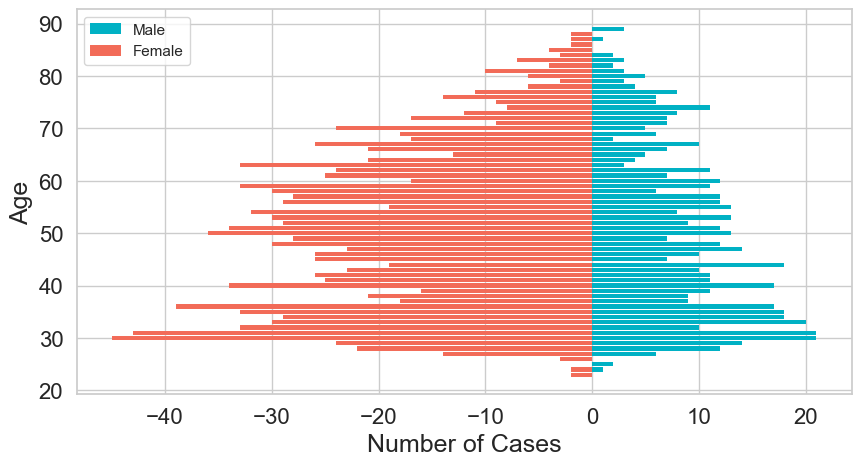

In [17]:
sns.set(style="whitegrid")
# Group the data by 'gender' and 'age' and count the number of cases for each age
age_counts = metaC.groupby(['gender', 'Age_at_MBsample']).size().unstack()
age_counts = age_counts.reset_index(drop=True).T.reset_index()

# Create a pyramid chart
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the pyramid chart for males and females
ax.barh(age_counts.Age_at_MBsample, age_counts[0], label='Male', color='#00b1c4', linewidth=0.01)
ax.barh(age_counts.Age_at_MBsample, -age_counts[1], label='Female', color='#f26b58', linewidth=0.01)
ax.set_xlabel('Number of Cases', fontsize=18)
ax.set_ylabel('Age', fontsize=18)
#ax.set_title('Age Distribution Pyramid for Males and Females', fontsize=18)
ax.legend()
plt.tick_params(labelsize=16)
plt.savefig('results/Fig1b_Pyramid.svg', bbox_inches='tight')
plt.savefig('results/Fig1b_Pyramid.png', bbox_inches='tight')

plt.show()

Panel C. Reads number

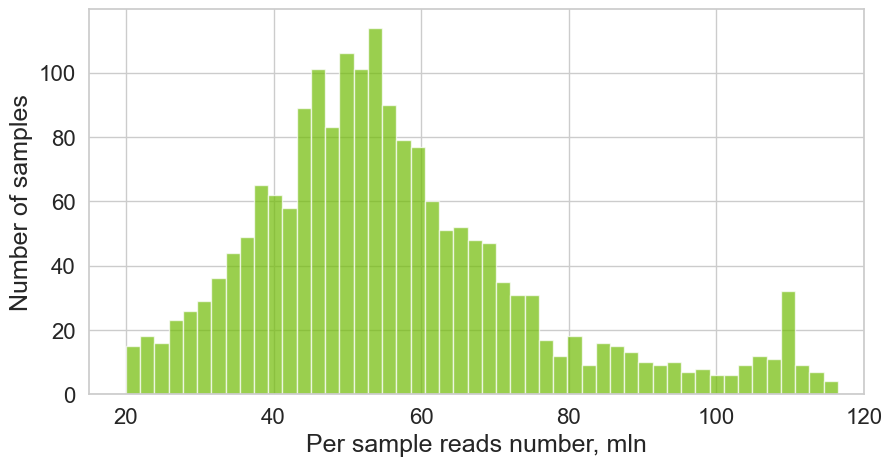

In [18]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")

plt.hist(bgi['BGI_reads_numb']/1000000, bins=50, color='#70bb03', alpha=0.7)
plt.xlabel('Per sample reads number, mln', fontsize=18)
plt.ylabel('Number of samples', fontsize=18)
plt.xlim(15,120)
# label size
plt.tick_params(labelsize=16)
plt.savefig('results/Fig1c_ReadsNumb.svg', bbox_inches='tight')
plt.savefig('results/Fig1c_ReadsNumb.png', bbox_inches='tight')

Panel D. Picture with a pipeline
- Check the separate pictures
  
Panel E. Representative MAGs quality

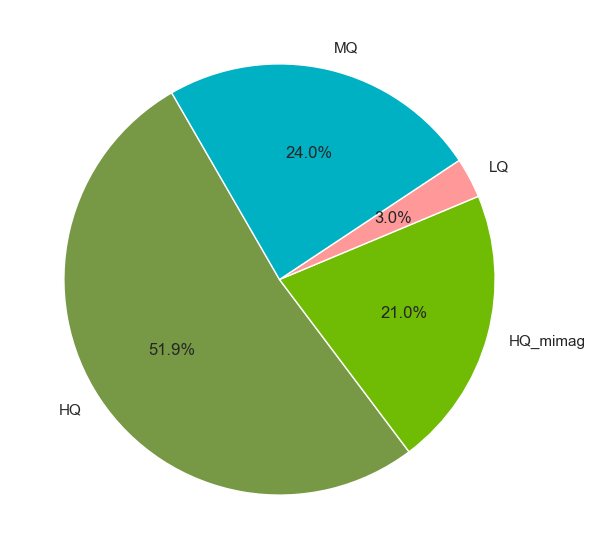

In [4]:
mq = rep['MAG_qual'].value_counts()
mq = mq.reset_index()
mq.rename(columns={'index': "mq", 'MAG_qual': "count"}, inplace=True)

mq = mq.sort_values(by='mq')

mq = rep['MAG_qual'].value_counts()
mq = mq.reset_index()
mq.rename(columns={'index': "mq", 'MAG_qual': "count"}, inplace=True)
mq = mq.sort_values(by='mq')

plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# draw a pie plot
plt.pie(mq['count'], labels=mq['mq'], autopct='%1.1f%%', startangle=120, colors=['#779945', '#70bb03', '#FF9999', '#00b1c4'])

plt.savefig('results/Fig1e_mq.png', dpi=300, bbox_inches='tight')
plt.savefig('results/Fig1e_mq.svg', bbox_inches='tight')

In [5]:
mq

,mq,count
0,HQ,1172
2,HQ_mimag,475
3,LQ,68
1,MQ,542


Panel F. Representative MAGs Completeness

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


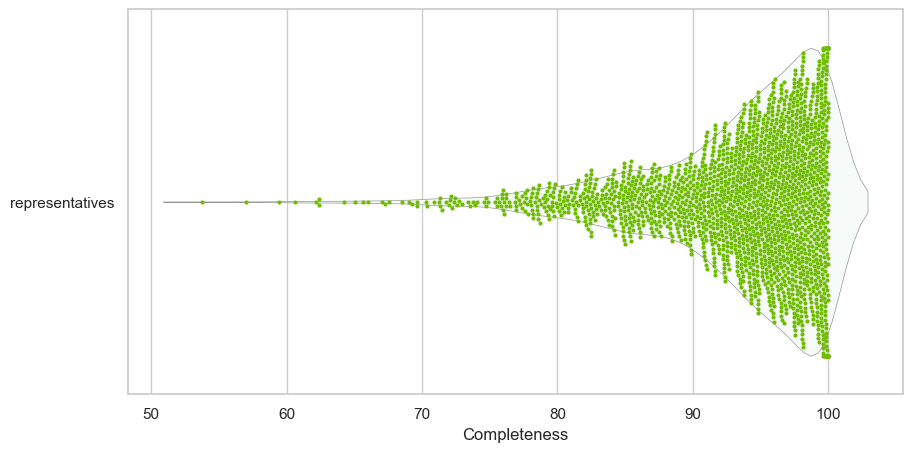

In [20]:
df = rep.copy()
df['name'] = 'representatives'

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
ax = sns.swarmplot(y="name", x="Completeness", data=df, size=3, color='#70bb03')
ax = sns.violinplot(y="name", x="Completeness", data=df, color='#f5fcfa',linewidth=0.5, inner=None)
plt.ylabel('')

plt.savefig('results/Fig1f_completness_cm2.png', dpi=300, bbox_inches='tight')
plt.savefig('results/Fig1f_completness_cm2.svg', bbox_inches='tight')

Panel G. Representative MAGs Contamination

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


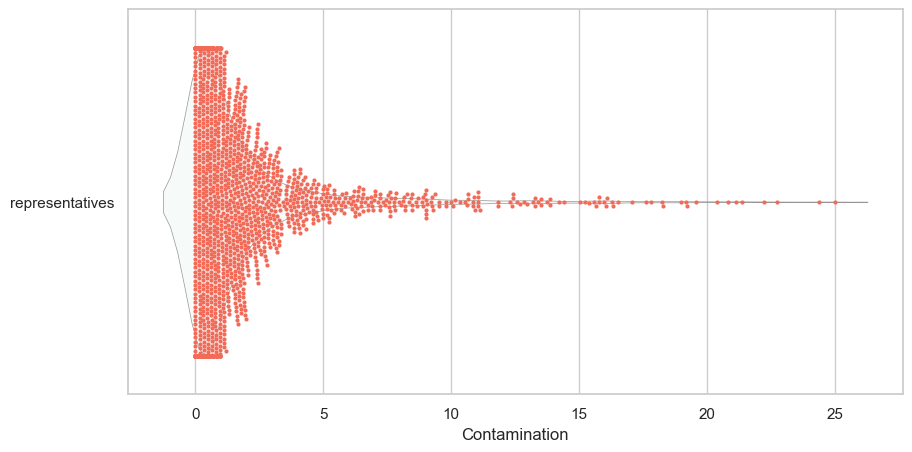

In [21]:
df['name'] = 'representatives'

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
ax = sns.swarmplot(y="name", x="Contamination", data=df, size=3, color='#f26b58')
ax = sns.violinplot(y="name", x="Contamination", data=df, color='#f5fcfa',linewidth=0.5, inner=None)
plt.ylabel('')

plt.savefig('results/Fig1g_contamination_cm2.png', dpi=300, bbox_inches='tight')
plt.savefig('results/Fig1g_contamination_cm2.svg', bbox_inches='tight')

### Figure 2. Comparison of population specific reference with global references 
Panel A. Presence at GTDB and USGG DBs

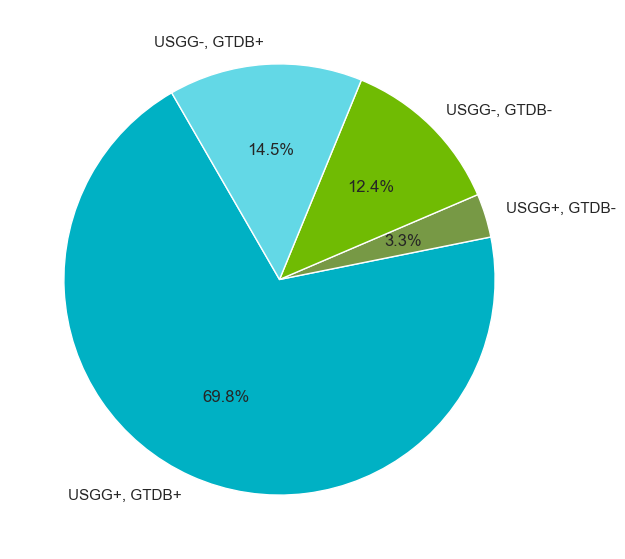

In [22]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# draw a pie plot
plt.pie([1576,74,279,328], labels=['USGG+, GTDB+','USGG+, GTDB-','USGG-, GTDB-','USGG-, GTDB+'], 
        autopct='%1.1f%%', startangle=120, colors=['#00b1c4', '#779945', '#70bb03', '#63d8e6'])

plt.savefig('results/Fig2a.png', dpi=300, bbox_inches='tight')
plt.savefig('results/Fig2a.svg', bbox_inches='tight')

Panel B. Aggregated amount of a new species

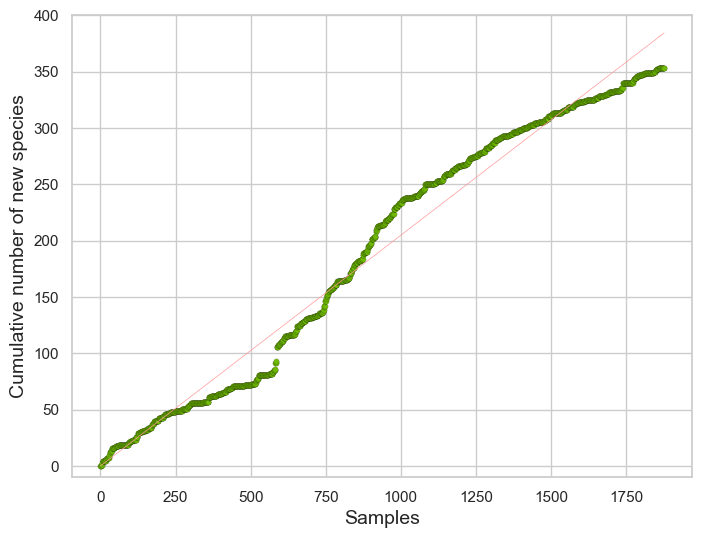

In [23]:
plt.figure(figsize=(8, 6))

plt.scatter(samples_df.index, samples_df['cumulative_undefined'], color='#70bb03', s=15, alpha=0.9, 
            label='Cumulative number of undefined species', edgecolors='black', linewidths=0.1)

plt.xlabel('Samples', fontsize=14)
plt.ylabel('Cumulative number of new species', fontsize=14)
plt.plot(X, y_pred, color=pinckC, linewidth=0.5, label='Regression line')  
plt.ylim(-10,400)
plt.grid()
plt.grid()

plt.savefig('results/2b_cumm1.png', dpi=300, bbox_inches='tight')
plt.savefig('results/2b_cumm1.svg', bbox_inches='tight')

Panel C. 

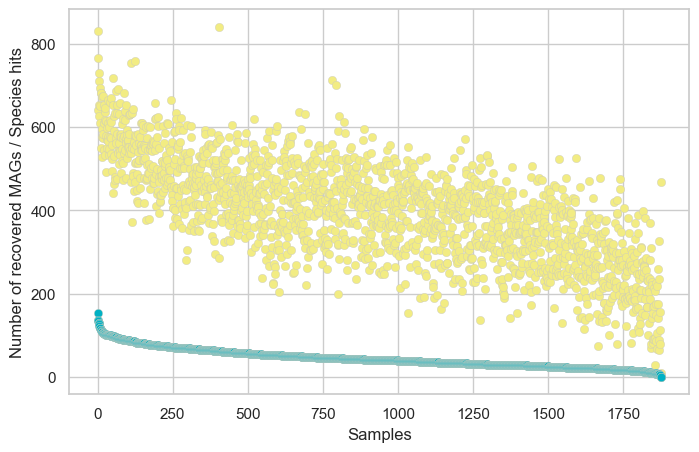

In [24]:
# rename columns
mrgN.columns = ['sample', 'MAGs number','sample_name' , 'Species hits']
# Calculate rolling mean
window_size = 100  
rolling_mean = mrgN['Species hits'].rolling(window=window_size).mean()

sns.set(style="whitegrid")
# Create a plot
fig, ax = plt.subplots(figsize=(8, 5))

sns.scatterplot(data=mrgN, x=mrgN.index, y='Species hits', ax=ax, color='#f2ec83', edgecolor='#cccbbe', linewidth=0.3)
sns.scatterplot(data=mrgN, x=mrgN.index, y='MAGs number', ax=ax, color='#00b1c4', edgecolor='#cccbbe',linewidth=0.3)

plt.xlabel('Samples')
plt.ylabel('Number of recovered MAGs / Species hits')

# Plot rolling mean
#plt.plot(mrgN.index, rolling_mean, color='black', label=f'Rolling Mean ({20} window)')

plt.savefig('results/2c_mags_vs_detect.png', dpi=300, bbox_inches='tight')
plt.savefig('results/2c_mags_vs_detect.svg', bbox_inches='tight')

Panel D. Prevalence by group

In [37]:
# prevalence by type
prev = rep[['rep_MAG_ID', 'prevalence_by_mapping', 'sp', 'present_at_UHGG','MAGs_per_cluster']].copy()  # Make a copy to avoid SettingWithCopyWarning
prev['perc'] = prev['prevalence_by_mapping'] / 2101 * 100

conditions = [
    (prev['present_at_UHGG'] == 'EstMAG_overlap') & (prev['sp'] == 'undefined'),
    (prev['present_at_UHGG'] == 'EstMAG_overlap') & (prev['sp'] != 'undefined'),
    (prev['present_at_UHGG'] != 'EstMAG_overlap') & (prev['sp'] == 'undefined'),
    (prev['present_at_UHGG'] != 'EstMAG_overlap') & (prev['sp'] != 'undefined')]

choices = [
    'GTBD-, USGG+',
    'GTBD+, USGG+',
    'GTBD-, USGG-',
    'GTBD+, USGG-']

prev['type'] = np.select(conditions, choices, default=np.nan)
prev = prev.sort_values(by='type')


/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 36.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 40.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 50.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 43.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ketpantuh/Library/Python/

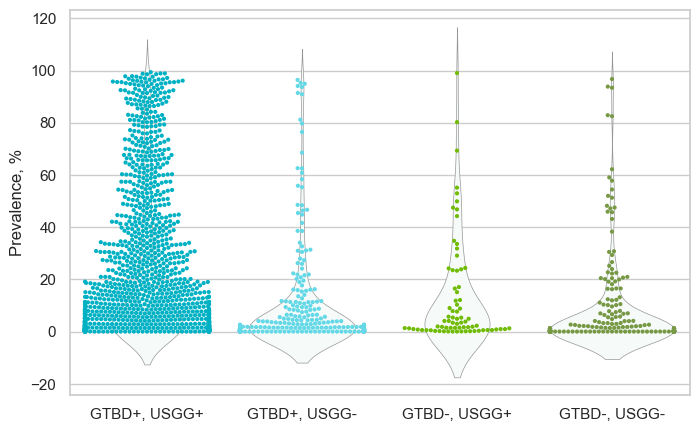

In [26]:
# colors
darckGreenC = '#779945'
greenC = '#70bb03'
darkBlueC = '#00b1c4'
blueC = '#63d8e6'

# Define colors for each type
clr = {'USGG+, GTDB+': darkBlueC,
       'USGG+, GTDB-': blueC,
       'USGG-, GTDB-': greenC,
       'USGG-, GTDB+': darckGreenC}

# Compare prevalence of overlaped and non-overlaped species
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

ax = sns.swarmplot(x="type", y="perc", data=prev, hue="type", size=3, palette=clr.values())
ax = sns.violinplot(x="type", y="perc", data=prev, color='#f5fcfa',linewidth=0.5, inner=None)
# legend false
plt.legend([],[], frameon=False)
#plt.legend(title='Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel('')
plt.ylabel('Prevalence, %')

plt.savefig('results/Fig2_prev.svg', bbox_inches='tight')
plt.savefig('results/Fig2_prev.png', bbox_inches='tight')

Panel E. Top 15 new sp. Number of recovered genomes and Prevalence by mapping

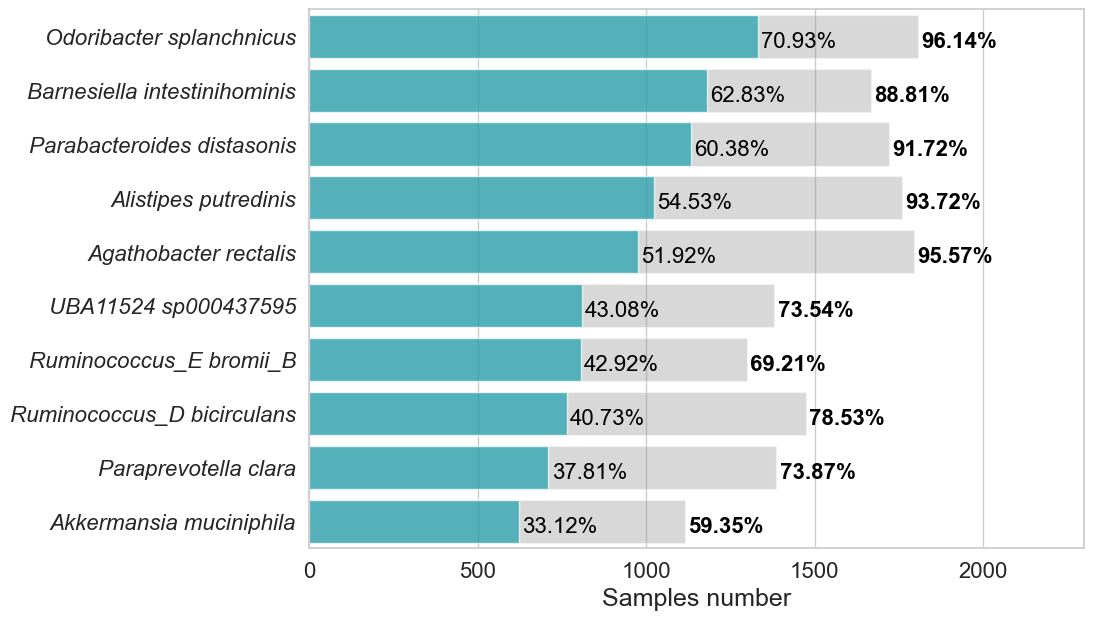

In [72]:
# plot common bins
pic1 = prev.sort_values(by='MAGs_per_cluster', ascending=False).head(10)
pic1 = pic1.reset_index(drop=True)
pic1['mapp_numb']=pic1['prevalence_by_mapping']/2101*1878
pic1['mapp_numb']=pic1['mapp_numb'].round()
pic1['perc_mag']=pic1['MAGs_per_cluster']/1878*100
pic1['perc']=pic1['perc'].round(2)
pic1['perc_mag']=pic1['perc_mag'].round(2)

plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

sns.barplot(x="mapp_numb", y="sp", data=pic1, color='grey', alpha=0.3)
sns.barplot(x="MAGs_per_cluster", y="sp", data=pic1, color='#04b4c4', alpha=0.7)
plt.xlim(0, 2300)
# make y labes italic
plt.yticks(fontstyle='italic')

plt.xlabel('Samples number', fontsize=18)
plt.ylabel('', fontsize=18)
plt.tick_params(labelsize=16)

# add annotation one by one with a loop
for line in range(0,pic1.shape[0]):
     plt.text(pic1['mapp_numb'][line]+10, line+0.2, str(pic1['perc'][line]) + '%',
             horizontalalignment='left', color='black', fontsize=16, weight='semibold')
     
# add annotation one by one with a loop
for line in range(0,pic1.shape[0]):
     plt.text(pic1['MAGs_per_cluster'][line]+10, line+0.2, str(pic1['perc_mag'][line]) + '%',
             horizontalalignment='left', color='black', fontsize=16)
     
plt.savefig('results/Fig2e_bin_per_cluster_comm.png', dpi=300, bbox_inches='tight')
plt.savefig('results/Fig2e_bin_per_cluster_comm.svg', bbox_inches='tight')

Panel F. Top 15 non overlap sp. Number of recovered genomes and Prevalence by mapping

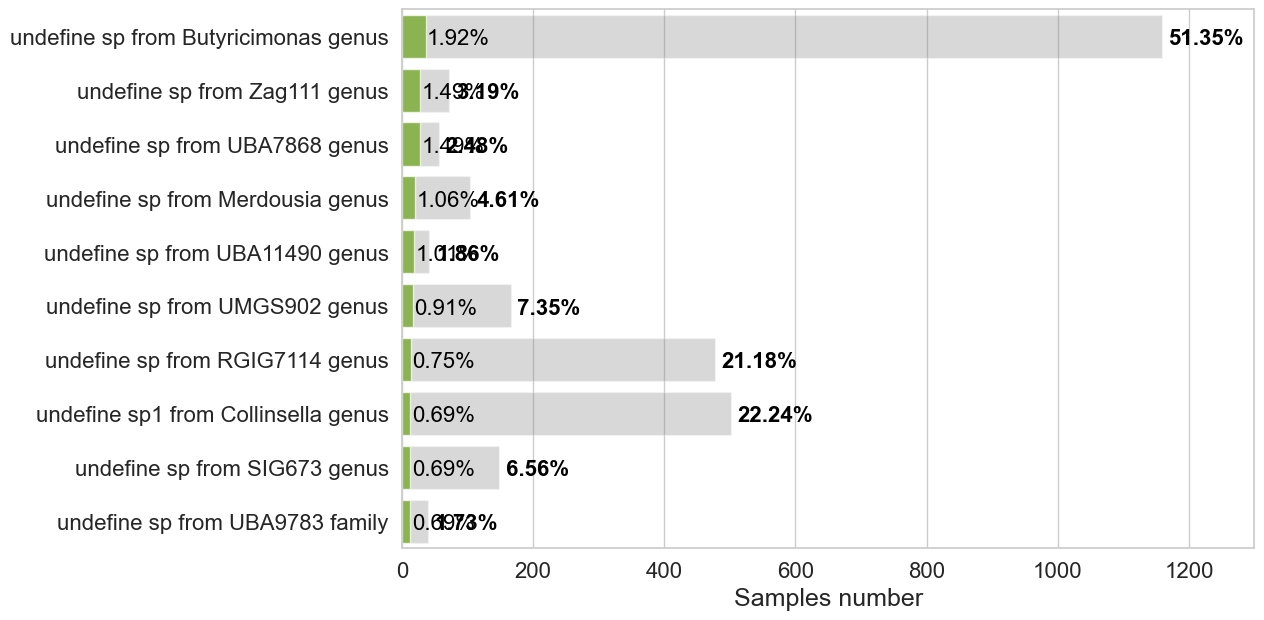

In [73]:
# plot EstUnique bins
pic3 = pd.read_excel('input/unknown_bins_m.xlsx')
pic3 = pic3.head(10)
plt.figure(figsize=(11, 7))
sns.set(style="whitegrid")

sns.barplot(x="bin_count", y="name", data=pic3, color='grey', alpha=0.3)
sns.barplot(x="bin_number_in_cluster", y="name", data=pic3, color='#70bb03', alpha=0.7)
plt.xlim(0, 1300)
# make y labes italic
#plt.yticks(fontstyle='italic')

plt.xlabel('Samples number', fontsize=18)
plt.ylabel('', fontsize=18)
plt.tick_params(labelsize=16)

# add annotation one by one with a loop
for line in range(0,pic3.shape[0]):
     plt.text(pic3['bin_number_in_cluster'][line]+2, line+0.15, pic3['perc'][line], 
             horizontalalignment='left', color='black', fontsize=16)
     
# add annotation one by one with a loop
for line in range(0,pic3.shape[0]):
     plt.text(pic3['bin_count'][line]+10, line+0.15, pic3['perc2'][line], 
             horizontalalignment='left', color='black', weight='semibold', fontsize=16)
     
plt.savefig('results/Fig2f_prev_NewSp.png', dpi=300, bbox_inches='tight')
plt.savefig('results/Fig2f_prev_NewSP.svg', bbox_inches='tight')

### Figure 3. Metagenome-wide association between the abundance of gut bacterial species and disease.
Check at the separate script "EstMB_MWAS.ipyb"

# Supplementary

### Figure S1. Phylum of all representative MAGs.

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_94948/1969007483.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  phy1 = phy1.append(new_data, ignore_index=True)


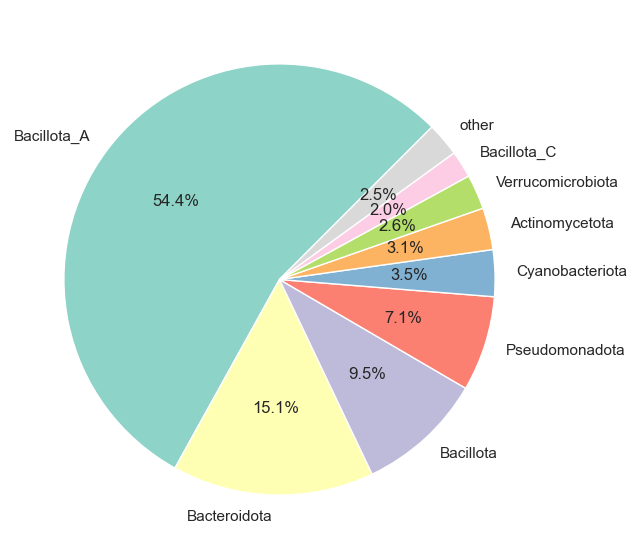

In [7]:
phy = rep['phylum'].value_counts()
phy = phy.reset_index()
phy.rename(columns={'index': "phylum", 'phylum': "count"}, inplace=True)
phy1 = phy.head(8)
new_data = pd.Series(['other', 56], index=phy1.columns)
phy1 = phy1.append(new_data, ignore_index=True)

plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")
colors = sns.color_palette("Set3")

# draw a pie plot
plt.pie(phy1['count'], labels=phy1['phylum'], autopct='%1.1f%%', startangle=45, colors=colors)

plt.savefig('results/S1_phylum.png', dpi=300, bbox_inches='tight')
plt.savefig('results/S1_phylum.svg', bbox_inches='tight')

### Figure S2. Bacterial species with the higher number of MAGs per species cluster.

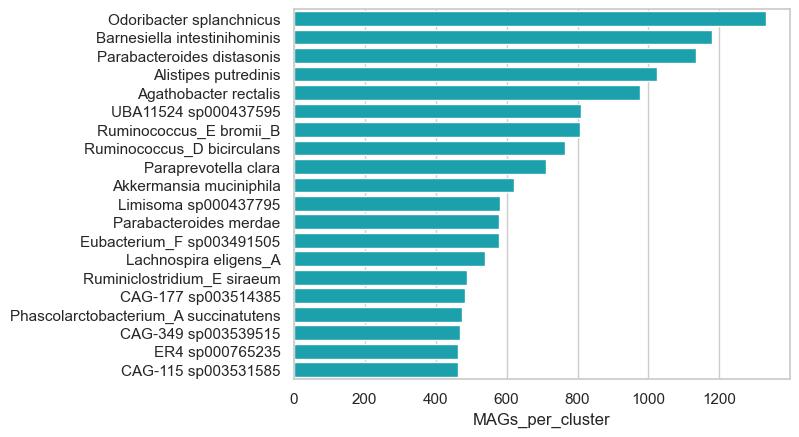

In [8]:
tp_sp = rep[['sp','MAGs_per_cluster']].head(20)
tp_sp = tp_sp.set_index('sp')
sns.barplot(y=tp_sp.index, x='MAGs_per_cluster', data=tp_sp, color='#04b4c4')
plt.ylabel('')

plt.savefig('results/S2_top_sp.png', dpi=300, bbox_inches='tight')
plt.savefig('results/S2_top_sp.svg', bbox_inches='tight')

### Figure S3. Number of recovered genomes per cluster for a new species.

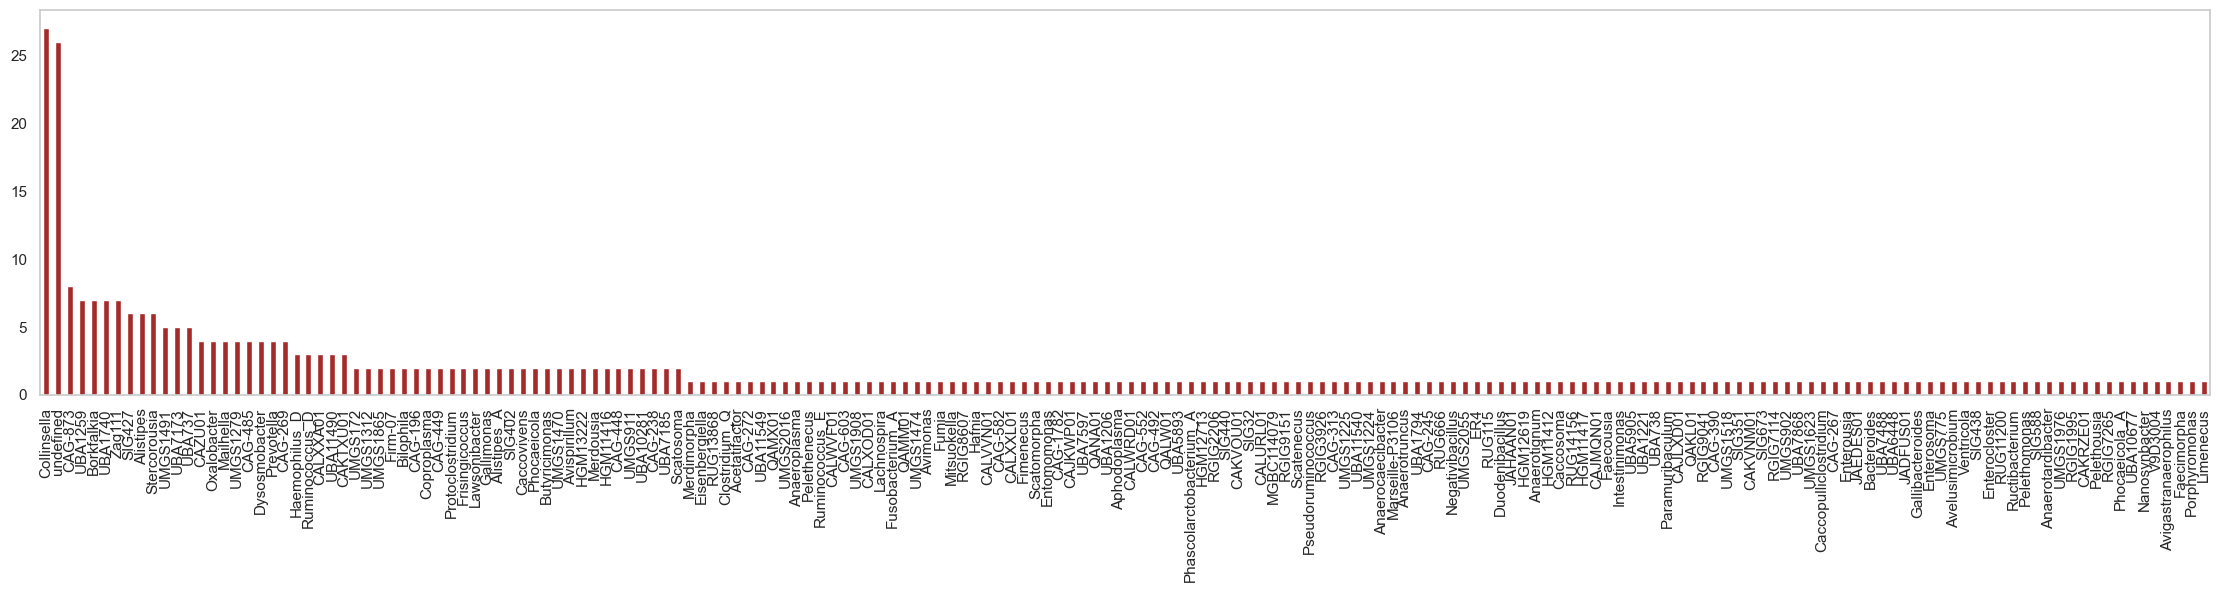

In [44]:
new = rep[rep['sp'] == 'undefined']

plt.figure(figsize=(28, 5))
new['genus'].value_counts().plot(kind='bar', color='brown')
plt.grid()

plt.savefig('results/S3.png', dpi=300, bbox_inches='tight')
plt.savefig('results/S3.svg', bbox_inches='tight')

### Figure S4. Number of recovered genomes per species. 

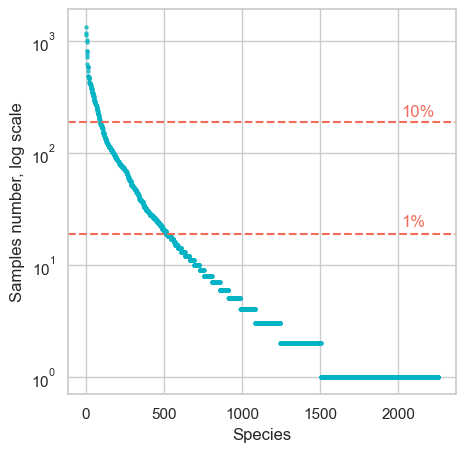

In [42]:
plt.figure(figsize=(5, 5))
sns.set(style="whitegrid")
repS5 = rep[['sp','MAGs_per_cluster','prevalence_by_mapping']].copy()
repS5['mapp_nmb'] = repS5['prevalence_by_mapping']/2101*1878
repS5a = repS5.sort_values(by='mapp_nmb', ascending=False).reset_index(drop=True)

plt.scatter(repS5.index,repS5['MAGs_per_cluster'], s=5, color='#04b4c4', alpha=0.7)

plt.yscale('log')
plt.axhline(y = 19, color = '#f26b58', linestyle = '--') 
plt.axhline(y = 187, color = '#f26b58', linestyle = '--') 
plt.text(2020,22,'1%', color = '#f26b58')
plt.text(2020,210,'10%', color = '#f26b58')
plt.ylabel('Samples number, log scale')
plt.xlabel('Species')
#plt.legend(['Genome recovered', 'Species detected'], loc='upper right')

plt.savefig('results/S4.png', dpi=300, bbox_inches='tight')
plt.savefig('results/S4.svg', bbox_inches='tight')


### Figure S5. Species prevalence detected by reads mapping against MAGs collection.

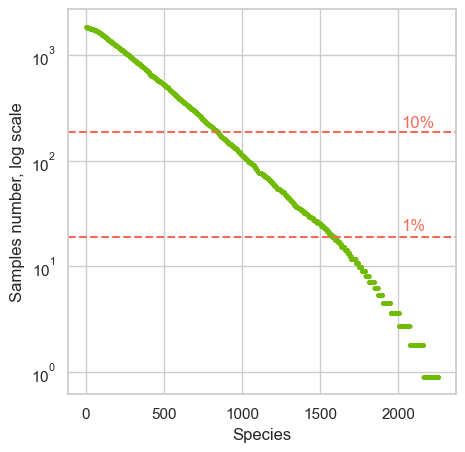

In [43]:
plt.figure(figsize=(5, 5))
sns.set(style="whitegrid")
repS5 = rep[['sp','MAGs_per_cluster','prevalence_by_mapping']].copy()
repS5['mapp_nmb'] = repS5['prevalence_by_mapping']/2101*1878
repS5a = repS5.sort_values(by='mapp_nmb', ascending=False).reset_index(drop=True)

plt.scatter(repS5a.index,repS5a['mapp_nmb'], s=5, color='#70bb03', alpha=0.7)
plt.yscale('log')
plt.axhline(y = 19, color = '#f26b58', linestyle = '--') 
plt.axhline(y = 187, color = '#f26b58', linestyle = '--') 
plt.text(2020,22,'1%', color = '#f26b58')
plt.text(2020,210,'10%', color = '#f26b58')
plt.ylabel('Samples number, log scale')
plt.xlabel('Species')
#plt.legend(['Genome recovered', 'Species detected'], loc='upper right')

plt.savefig('results/S5.png', dpi=300, bbox_inches='tight')
plt.savefig('results/S5.svg', bbox_inches='tight')


### Figure S6. Relationship between Species Prevalence and number of samples where species genome was assembled.

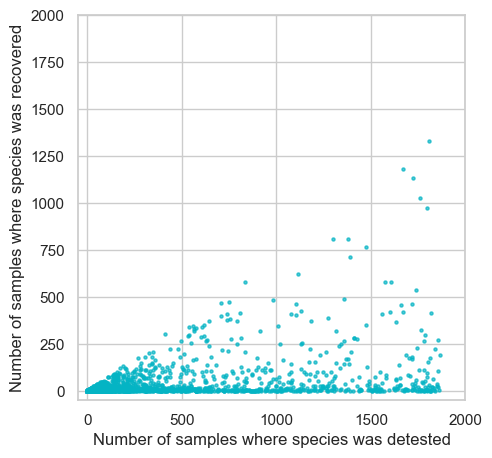

In [27]:
plt.figure(figsize=(5, 5))
sns.set(style="whitegrid")
repS6 = rep[['sp','MAGs_per_cluster','prevalence_by_mapping']].copy()
repS6['mapp_nmb'] = repS6['prevalence_by_mapping']/2101*1878

plt.scatter(repS6['mapp_nmb'],repS6['MAGs_per_cluster'], s=5, color='#04b4c4', alpha=0.7)
plt.xlabel('Number of samples where species was detested')
plt.ylabel('Number of samples where species was recovered')
plt.xlim(-50, 2000)
plt.ylim(-50, 2000)
plt.xticks(np.arange(0, 2001, 500))
#plt.yticks(np.arange(0, 2001, 500))

plt.savefig('results/S6.png', dpi=300, bbox_inches='tight')
plt.savefig('results/S6.svg', bbox_inches='tight')